In [57]:
%load_ext autoreload
%autoreload 2
import json
from scipy import sparse
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Read the dataset with Pandas

In [58]:
%store -r docno2TextDict

In [59]:
dataset = pd.DataFrame(list(docno2TextDict.items()), columns = ["docno", "content"])
print(type(dataset))
dataset

<class 'pandas.core.frame.DataFrame'>


,docno,content
0,ATS.940414.0041,"cc Stuttgart, 14 avr (ats/afp) Les autorités..."
1,ATS.940301.0067,"hs Jérusalem, 1er mars (ats/afp/reuter) Isra..."
2,ATS.940315.0137,"jq rp Zurich, 15 mars (ats) Le fabricant de ..."
3,ATS.940823.0019,"ht ce sh Golaten (BE), 23 août (ats) De l'he..."
4,ATS.941121.0098,"ni Paris/Genève, 21 nov (ats/afp) Trois cent..."
5,ATS.940724.0008,"rf wi Nyon, 24 juil (ats) Le champagne a cou..."
6,ATS.941129.0117,"pf wm uc St-Gall, 29 nov (ats) La fusillade ..."
7,ATS.940114.0039,"ew tp jr Genève, 14 jan (ats) Les appartemen..."
8,ATS.940817.0111,"rp Londres, 17 août (ats/reuter) Le taux de ..."
9,ATS.940111.0102,"bb Berne, 11 jan (ats) Les Archives littérai..."


# 2. Tokeninzing, computing IDF and TFIDF term-document matrix

In [60]:
#tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

tfidf_vectorizer = TfidfVectorizer(min_df=2, norm=None, stop_words='english') 
t0 = time()
clef_features_idf = tfidf_vectorizer.fit(dataset["content"])
print("FIT done in %0.3fs." % (time() - t0))

FIT done in 87.591s.


In [61]:
clef_tfidf_matrix = tfidf_vectorizer.transform(dataset["content"])
print("FIT-TRANSFORM done in %0.3fs." % (time() - t0))

FIT-TRANSFORM done in 180.149s.


In [62]:
idf_vectorizer = TfidfVectorizer(min_df=2, binary=True, norm=None, stop_words='english')
t0 = time()
clef_idf_matrix = idf_vectorizer.fit_transform(dataset["content"])
print("FIT-TRANSFORM done in %0.3fs." % (time() - t0))

FIT-TRANSFORM done in 90.572s.


In [63]:
# %store clef_features_idf
# %store clef_tfidf_matrix
# %store clef_idf_matrix

# 3. Terms and IDF

In [64]:
print("Number of terms in dictionary:", len(clef_features_idf.idf_))
print()

top10IDFTerm_idx = clef_features_idf.idf_.argsort()[::-1][:100]
print(top10IDFTerm_idx)
print(clef_features_idf.idf_[top10IDFTerm_idx])

Number of terms in dictionary: 195539

[195538 113587 113567 113568 113569 113571 113576 113577   8755 113479
 113593 113604 113610 113616 113622 113632 113565 113563 113559 113552
 113549   8757 113541 113538 113537 113533 113526 113520 113518 113510
 113505 113486 113481 113639 113640 113641 113718 113797 113785 113779
 113764 113760 113759 113756 113753 113747 113746 113740 113735 113727
 113721 113717 113645 113715 113712 113711 113709 113698 113695 113692
 113682 113671 113670 113663 113662 113654 113653 113480   8762 113802
 113267 113241 113247 113248 113249 113251 113256 113268 113459 113271
 113273 113282 113289 113290 113294 113236 113235 113224   8800 113209
 113196 113193 113185 113184 113180 113178 113173 113171 113169 113166]
[ 11.98784878  11.98784878  11.98784878  11.98784878  11.98784878
  11.98784878  11.98784878  11.98784878  11.98784878  11.98784878
  11.98784878  11.98784878  11.98784878  11.98784878  11.98784878
  11.98784878  11.98784878  11.98784878  11.98784878

In [65]:
inv_vocab = {v: k for k, v in clef_features_idf.vocabulary_.items()}
for term_id in top10IDFTerm_idx[:10]:
    print(inv_vocab[term_id], clef_features_idf.idf_[term_id])

üs 11.9878487754
manquais 11.9878487754
manonviller 11.9878487754
manonvillier 11.9878487754
manoplax 11.9878487754
manorama 11.9878487754
manouchehr 11.9878487754
manoucher 11.9878487754
accommodeur 11.9878487754
manisero 11.9878487754


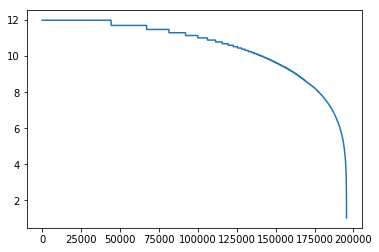

In [66]:
plt.plot(sorted(clef_features_idf.idf_, reverse=True))
plt.show()

# 4. Top 10 IDF terms and their TFIDF

In [67]:
for i in range(clef_idf_matrix.shape[0]):
    if i==10:
        break
#     print(dataset["title"].iloc[i])
#     print(dataset["content"].iloc[i])
    idf_row = clef_idf_matrix.getrow(i) # this is a 1 x 659255 csr matrix
    tfidf_row = clef_tfidf_matrix.getrow(i) # this is a 1 x 659255 csr matrix
    top10Terms_tfidf_idx = tfidf_row.data.argsort()[::-1][:10] # index of top 10 terms in the small array with nonzeros 
    top10Terms_idf_idx = idf_row.data.argsort()[::-1][:10]
    
#     print(row.data) # give only nonzero values so the array is much less than 659255, e.g. 30
#     print(row.indices) # gives the actual indices of the non zero terms
    
    print("-----------------")
    print("Document: ",i)
    print()
    
    print("Top 10 Highest IDF")
    print(top10Terms_idf_idx)
    print([inv_vocab[term_id] for term_id in idf_row.indices[top10Terms_idf_idx]])
    print(idf_row.indices[top10Terms_idf_idx])
    print("IDF values: ",idf_row.data[top10Terms_idf_idx])
    print("TFIDF values: ", tfidf_row.data[top10Terms_idf_idx])
    print()
    
    print("Top 10 Highest TFIDF")
    print(top10Terms_tfidf_idx)
    print([inv_vocab[term_id] for term_id in tfidf_row.indices[top10Terms_tfidf_idx]])
    print(tfidf_row.indices[top10Terms_tfidf_idx])
    print("TFIDF values: ", tfidf_row.data[top10Terms_tfidf_idx])
    print("IDF values: ", idf_row.data[top10Terms_tfidf_idx])
    print()

-----------------
Document:  0

Top 10 Highest IDF
[ 71  66 142  68  24  18 124 127 121  15]
['toluène', 'grit', 'détergent', 'benzène', 'cancérigènes', 'pressées', 'conditionnement', 'analysées', 'négligences', 'olive']
[178134  84807  63545  25507  34823 141377  45015  14285 127556 129180]
IDF values:  [ 11.98784878  11.47702315  10.60155441  10.04193863   9.39758161
   9.32526095   8.64380981   8.60912425   8.37693086   8.18118629]
TFIDF values:  [ 2.77391487  4.11083088  4.75415271  6.06627036  2.25921076  7.12288172
  6.12991562  3.97384378  8.64380981  6.30540344]

Top 10 Highest TFIDF
[ 59  84  83 131 130  86  85  14  87 106]
['olive', 'huiles', 'hydrocarbures', 'benzène', 'cancérigènes', 'hambourg', 'huile', 'toluène', 'grit', 'détergent']
[129180  90916  91340  25507  34823  87366  90912 178134  84807  63545]
TFIDF values:  [ 49.08711771  38.9657812   22.56582197  20.08387725  18.79516322
  13.73970993  12.74700973  11.98784878  11.47702315  10.60155441]
IDF values:  [ 2.85058

# 5. Position of High terms in Docs

In [68]:
# do some regression to find alpha for each (buckets with freqs?)

# as described here: https://www.nltk.org/_modules/nltk/tokenize.html
# the default analyzer used in scikit is called "word": 
# https://towardsdatascience.com/hacking-scikit-learns-vectorizers-9ef26a7170af

def find_positions_term(term, token_text):
    pos = [k for k,v in enumerate(token_text) if v==term]
    return pos

def find_positions_termlist(terms, token_text):
    term_set = set(terms)
    pos = [k for k,v in enumerate(token_text) if v in term_set]
    return pos

In [69]:
analyzer = tfidf_vectorizer.build_analyzer()

In [70]:
def getDistributionForRows(row_idxs, matrix, dataset, num_passage=10, n_terms=5):
    cum_sum = np.zeros(num_passage)
    #for i in progress_bar.iter_progress(row_idxs):
    for i in row_idxs:

        row = matrix.getrow(i) # this is a 1 x 659255 csr matrix
        top10Terms_idx = row.data.argsort()[::-1][:10]

        # find the positions of high idf/tfidf terms in the text
        top_10_terms = [inv_vocab[term_id] for term_id in row.indices[top10Terms_idx]]

        # inside the document
        all_text = dataset["content"].iloc[i]
        token_text = analyzer(all_text.lower())

        all_pos = find_positions_termlist(top_10_terms[:n_terms], token_text)
        all_pos.append(len(token_text))
        n,_ = np.histogram(all_pos, bins=num_passage, density=False, weights=np.ones(len(all_pos)) / len(all_pos))
        cum_sum += n

    return cum_sum/len(row_idxs) 

## 5.1. IDF

In [71]:
# Default: 10 passages
# Number of terms to be considered: 5 
getDistributionForRows(range(clef_idf_matrix.shape[0]), clef_idf_matrix, dataset)

array([ 0.22368271,  0.07118132,  0.07173065,  0.07106639,  0.07022747,
        0.07191093,  0.07020056,  0.0691341 ,  0.06879176,  0.21207411])

In [72]:
# Default: 10 passages
# Number of terms to be considered: 10 
getDistributionForRows(range(clef_idf_matrix.shape[0]), clef_idf_matrix, dataset, n_terms=10)

array([ 0.16351071,  0.08371114,  0.08482932,  0.08444579,  0.08465376,
        0.08704715,  0.08617426,  0.08380754,  0.08337399,  0.15844634])

In [73]:
# for num_passage in [2,4,8,16]:
#     distrib = getDistributionForRows(range(idf_matrix.shape[0]), idf_matrix, dataset, num_passage)
#     print("Num passage", num_passage)
#     print(distrib)

## 5.2. TFDIF

In [74]:
# 10 passages on top 5 terms in the text
getDistributionForRows(range(clef_tfidf_matrix.shape[0]), clef_tfidf_matrix, dataset)

array([ 0.16886757,  0.09170658,  0.08795911,  0.08602898,  0.08568068,
        0.08748719,  0.08588956,  0.08414135,  0.08246093,  0.13977805])

In [75]:
# 10 passages on top 10 terms in the text
getDistributionForRows(range(clef_tfidf_matrix.shape[0]), clef_tfidf_matrix, dataset, n_terms=10)

array([ 0.14231813,  0.09694768,  0.09345881,  0.09149088,  0.09118856,
        0.09348764,  0.09239727,  0.09047912,  0.088962  ,  0.11926992])

In [ ]:
# for num_passage in [2,4,8,16]:
#     distrib = getDistributionForRows(range(tfidf_matrix.shape[0]), tfidf_matrix, dataset, num_passage)
#     print("Num passage", num_passage)
#     print(distrib)

In [88]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

ind = [x+0.5 for x in range(0,11)]
vals = [x+1 for x in range(0,10)]


def plotSteps(style):
    plt.style.use(style)
    histogram=plt.figure()
    
    # we add the first element twice to make x,y match
    top10_idf = [0.16351071, 0.16351071,  0.08371114,  0.08482932,  0.08444579,  0.08465376,  0.08704715,  0.08617426,  0.08380754,  0.08337399,  0.15844634]
    top10_tfidf = [0.14231813, 0.14231813,  0.09694768,  0.09345881,  0.09149088,  0.09118856, 0.09348764,  0.09239727,  0.09047912,  0.088962  ,  0.11926992]

    top5_idf = [0.22368271, 0.22368271,  0.07118132,  0.07173065,  0.07106639,  0.07022747, 0.07191093,  0.07020056,  0.0691341 ,  0.06879176,  0.21207411]
    top5_tfidf = [0.16886757, 0.16886757, 0.09170658,  0.08795911,  0.08602898,  0.08568068, 0.08748719,  0.08588956,  0.08414135,  0.08246093,  0.13977805]

    plt.step(range(0,11),top10_idf, label="Top 10 IDF", linewidth=2.0)
    plt.step(range(0,11),top10_tfidf, label="Top 10 TFIDF", linewidth=2.0)
    plt.step(range(0,11),top5_idf, label="Top 5 IDF", linewidth=2.0)
    plt.step(range(0,11),top5_tfidf, label="Top 5 TFIDF", linewidth=2.0)
    plt.xticks(ind, vals)
#     plt.title("Distribution of important terms in the documents")
    plt.xlabel("Passage ID")
    plt.ylabel("Probability")
    plt.legend(loc="best")
    plt.savefig("probabDistribCLEF.pdf")
    #plt.grid(False)
    plt.show()

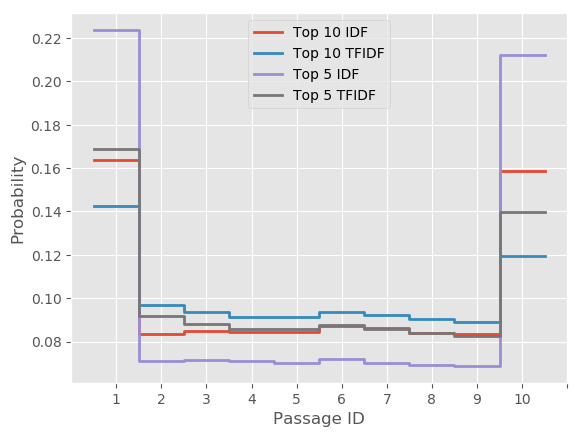

In [89]:
for style in ["ggplot"]:
    plotSteps(style)